In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
with open('income_Csv_K-Means.csv') as file_obj:
    file_data = csv.DictReader(file_obj)
    file_list = list(file_data)
    for i in file_list[:]:
        print(i)

OrderedDict([('Name', 'Rob'), ('Age', '27'), ('Income($)', '70000')])
OrderedDict([('Name', 'Michael'), ('Age', '29'), ('Income($)', '90000')])
OrderedDict([('Name', 'Mohan'), ('Age', '29'), ('Income($)', '61000')])
OrderedDict([('Name', 'Ismail'), ('Age', '28'), ('Income($)', '60000')])
OrderedDict([('Name', 'Kory'), ('Age', '42'), ('Income($)', '150000')])
OrderedDict([('Name', 'Gautam'), ('Age', '39'), ('Income($)', '155000')])
OrderedDict([('Name', 'David'), ('Age', '41'), ('Income($)', '160000')])
OrderedDict([('Name', 'Andrea'), ('Age', '38'), ('Income($)', '162000')])
OrderedDict([('Name', 'Brad'), ('Age', '36'), ('Income($)', '156000')])
OrderedDict([('Name', 'Angelina'), ('Age', '35'), ('Income($)', '130000')])
OrderedDict([('Name', 'Donald'), ('Age', '37'), ('Income($)', '137000')])
OrderedDict([('Name', 'Tom'), ('Age', '26'), ('Income($)', '45000')])
OrderedDict([('Name', 'Arnold'), ('Age', '27'), ('Income($)', '48000')])
OrderedDict([('Name', 'Jared'), ('Age', '28'), ('Inco

In [3]:
df = pd.read_csv('income_Csv_K-Means.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Income')

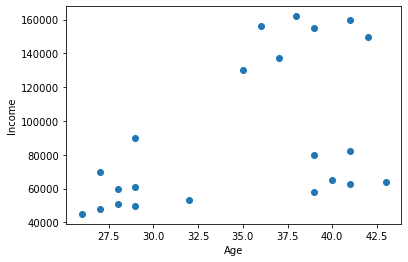

In [5]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [6]:
from sklearn.preprocessing import MinMaxScaler


In [7]:
Normalize = MinMaxScaler()
Normalize.fit(df[['Income($)']])
df['Income($)']= Normalize.transform(df[['Income($)']])

In [8]:
df.head()

,Name,Age,Income($)
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436


In [9]:
Normalize.fit(df[['Age']])
df['Age'] = Normalize.transform(df[['Age']])

In [10]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


#### Now That we have Normalized our data into the Same Scale , we will Apply the K-Means Algo

In [11]:

from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters = 3)
cluster_predict = km.fit_predict(df[['Age', 'Income($)']])
cluster_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['clusters'] = cluster_predict
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [14]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [15]:
centers_y = km.cluster_centers_[:, 1]

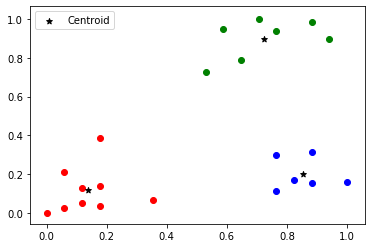

In [16]:
df1 = df[df['clusters'] == 0]
df2 = df[df['clusters'] == 1]
df3 = df[df['clusters'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red')
plt.scatter(df3['Age'], df3['Income($)'], color = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'Centroid')
plt.legend()


### Elbow Plot

In [17]:
sse = []
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [18]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.21055478995472493,
 0.17840674931327932,
 0.13265419827245162,
 0.10497488680620906,
 0.07831232180040332]

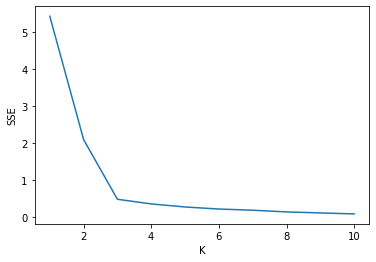

In [19]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

#### Test for creating our own Fit and Predict functions and compare it with the in-built K_means functions of fit & Predict.

In [4]:
def fit(data, k_clusters = 3, max_iter = 20):
    mean = []
    for i in range(k_clusters):
        mean.append(data[i])     #### Picking the Random Mean Values
    for i in range(max_iter):
        ## Assign the cluster that the data point belongs to
        ## Create an Empty Cluster and for every iteration put the data point in the new fresh cluster 
        clusters = []
        for j in range(k_clusters):
            clusters.append([])
        dist = []
        for point in data:
            
            distances = [(point - m)**2 for m in mean]
            min_distance = min(distances)
            l = distances.index(min_distance)
            clusters[l].append(point)
            
        ## Calculate the new Mean Values and override the existing value of the mean in each iteration.    
        change = False   
        for j in range(k_clusters):
            new_mean = np.average(clusters[j], axis = 0)
            if not np.array_equal(means[j], new_mean):
                change = True
            mean[j] = new_mean
        if change is False:
            break
    return mean
        

In [6]:
def predict(new_test_data, mean):
    prediction = []
    for point in new_test_data:
        distances = [((point - m)**2).sum() for m in mean]
        min_distance = min(distances)
        l = distances.index(min(min_distances))
        predictions.append(l)
        
    return predictions
        